## Jamboree Education - Linear Regression
### About Jamboree
<p>Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problemsolving methods ensure maximum scores with
minimum effort. They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature
estimates the chances of graduate admission from an Indian perspective.</p>

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help
predict one's chances of admission given the rest of the variables.

### Problem Statement
- Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.
- Drop the unique row Identifier if you see any. This step is important as you don’t want your model to build some understanding based on row numbers.
- Use Non-graphical and graphical analysis for getting inferences about variables.
- This can be done by checking the distribution of variables of graduate applicants.
- Once you’ve ensured that students with varied merit apply for the university, you can start understanding the relationship between different factors responsible for graduate
admissions.
- Check correlation among independent variables and how they interact with each other.
- Use Linear Regression from (Statsmodel library) and explain the results.
- Test the assumptions of linear regression:
  - Multicollinearity check by VIF score
  -  Mean of residuals
  - Linearity of variables (no pattern in residual plot)
  - Test for Homoscedasticity
  - Normality of residuals
- Do model evaluation- MAE, RMSE, R2 score, Adjusted R2.
- Provide actionable Insights & Recommendations


In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [436]:
df = pd.read_csv('Jamboree_Admission.csv')
df=df.rename(columns={"Chance of Admit ":"Chance of Admit","LOR ":"LOR"})
df.set_index('Serial No.', inplace = True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


### Identification of variables and data types:


In [437]:
df.shape

(500, 8)

In [438]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [439]:
for i in df.columns:
    print(i,':',df[i].nunique())

GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR : 9
CGPA : 184
Research : 2
Chance of Admit : 61


In [440]:
for i in df.columns:
    print(i,'minimum',':',min(df[i]))
    print(i,'maximum',':',max(df[i]))

GRE Score minimum : 290
GRE Score maximum : 340
TOEFL Score minimum : 92
TOEFL Score maximum : 120
University Rating minimum : 1
University Rating maximum : 5
SOP minimum : 1.0
SOP maximum : 5.0
LOR minimum : 1.0
LOR maximum : 5.0
CGPA minimum : 6.8
CGPA maximum : 9.92
Research minimum : 0
Research maximum : 1
Chance of Admit minimum : 0.34
Chance of Admit maximum : 0.97


In [441]:
#checking datatypes
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


all columns are numerical

In [443]:
#checking null values
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [444]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


mean and median are almost same. so there is less chance of outlier

In [445]:
for i in df.columns:
    print(i,':',df[i].value_counts())

GRE Score : 312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
299    10
298    10
331     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: GRE Score, dtype: int64
TOEFL Score : 110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
108    19
113    19
109    19
114    18
116    16
115    11
118    10
98     10
119    10
120     9
117     8
97      7
96      6
95      3
93      2
94      2
92      1
Name: TOEFL Score, dtype: int64
University Rating : 3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64
SOP : 4.0    89
3.5    88
3.0

In [446]:
df.duplicated().sum()

0

### Distribution of the quantitive data

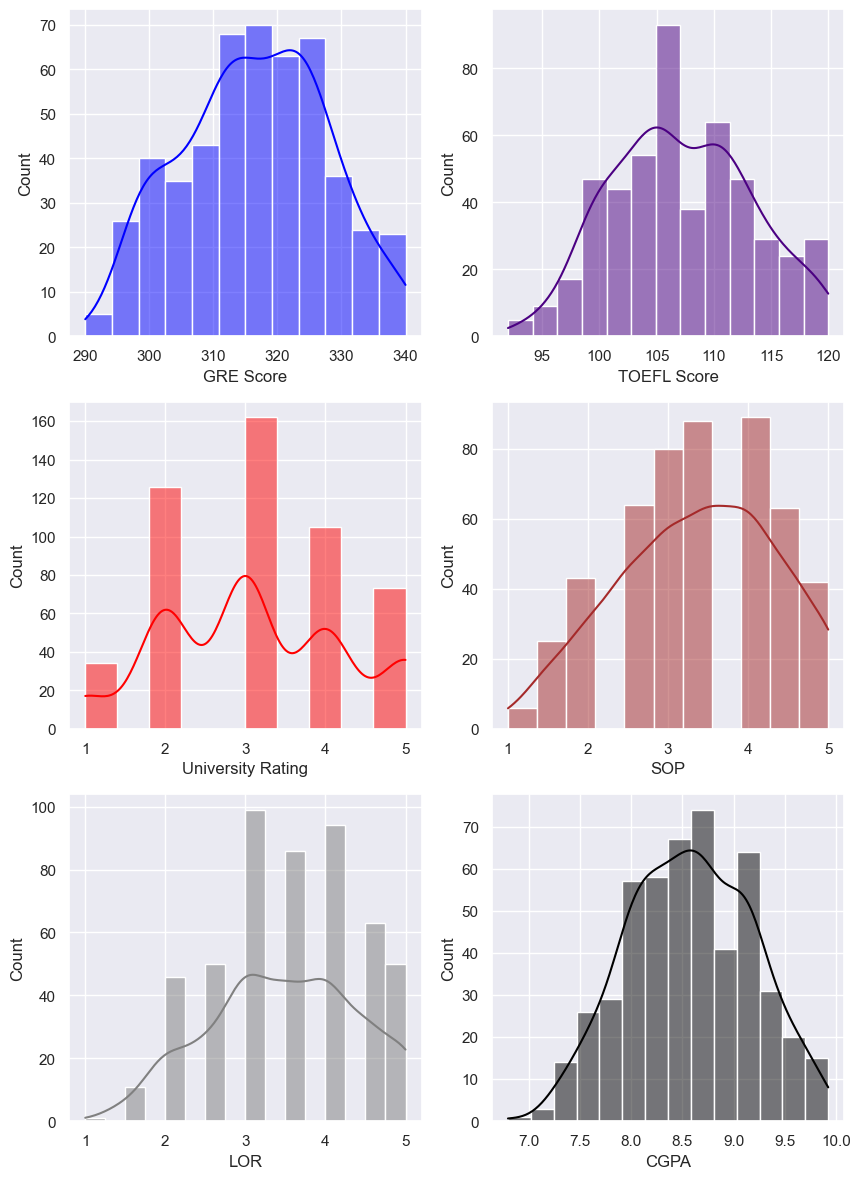

In [447]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10,8))
fig.subplots_adjust(top=1.5)
sns.histplot(data=df, x="GRE Score", kde=True,color="blue", ax=axis[0,0])
sns.histplot(data=df, x="TOEFL Score", kde=True,color="indigo", ax=axis[0,1])
sns.histplot(data=df, x="University Rating", kde=True,color="red", ax=axis[1,0])
sns.histplot(data=df, x="SOP", kde=True,color="brown", ax=axis[1,1])
sns.histplot(data=df, x="LOR", kde=True,color="grey", ax=axis[2,0])
sns.histplot(data=df, x="CGPA", kde=True,color="black", ax=axis[2,1])
plt.show()

Values of University Rating, LOR , SOP are ranges from 0 to 5. 
CGPA is ranges from 7 to 10. 
GRE score ranges from 290 to 340. 
TOEFL score ranges from 90 to 120

### Correlation of the quantitative data

<Axes: >

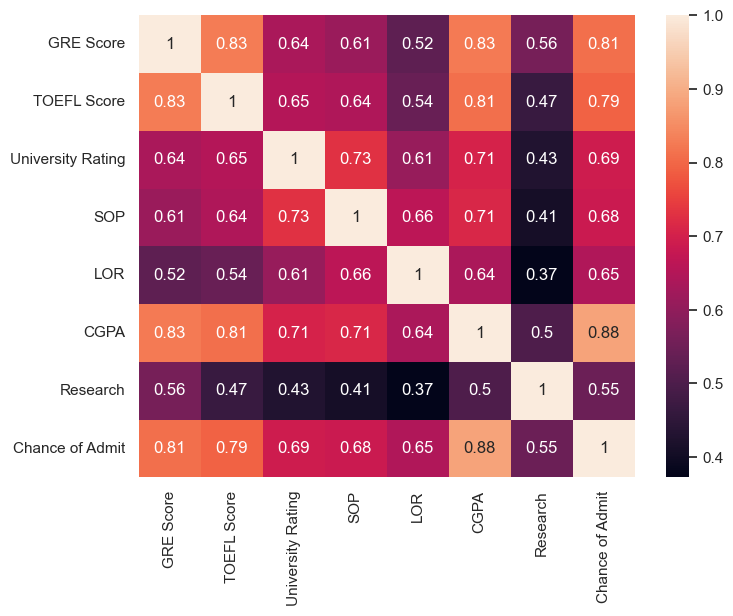

In [448]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

- Dependent column - 'Chance of admit' has higher correlation with CGPA
- 'Chance of admit' has second higher correlation with GRE score the TOFEL score

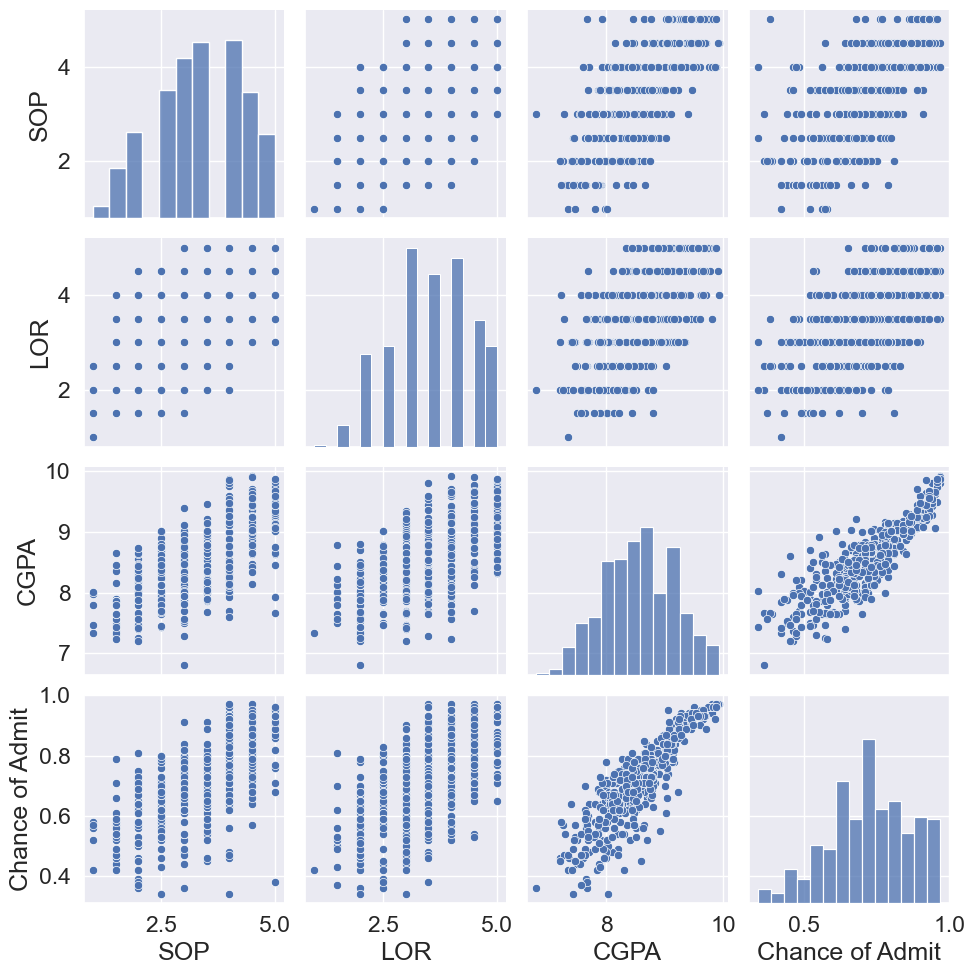

In [464]:
sns.pairplot(df.select_dtypes(include='float64'))

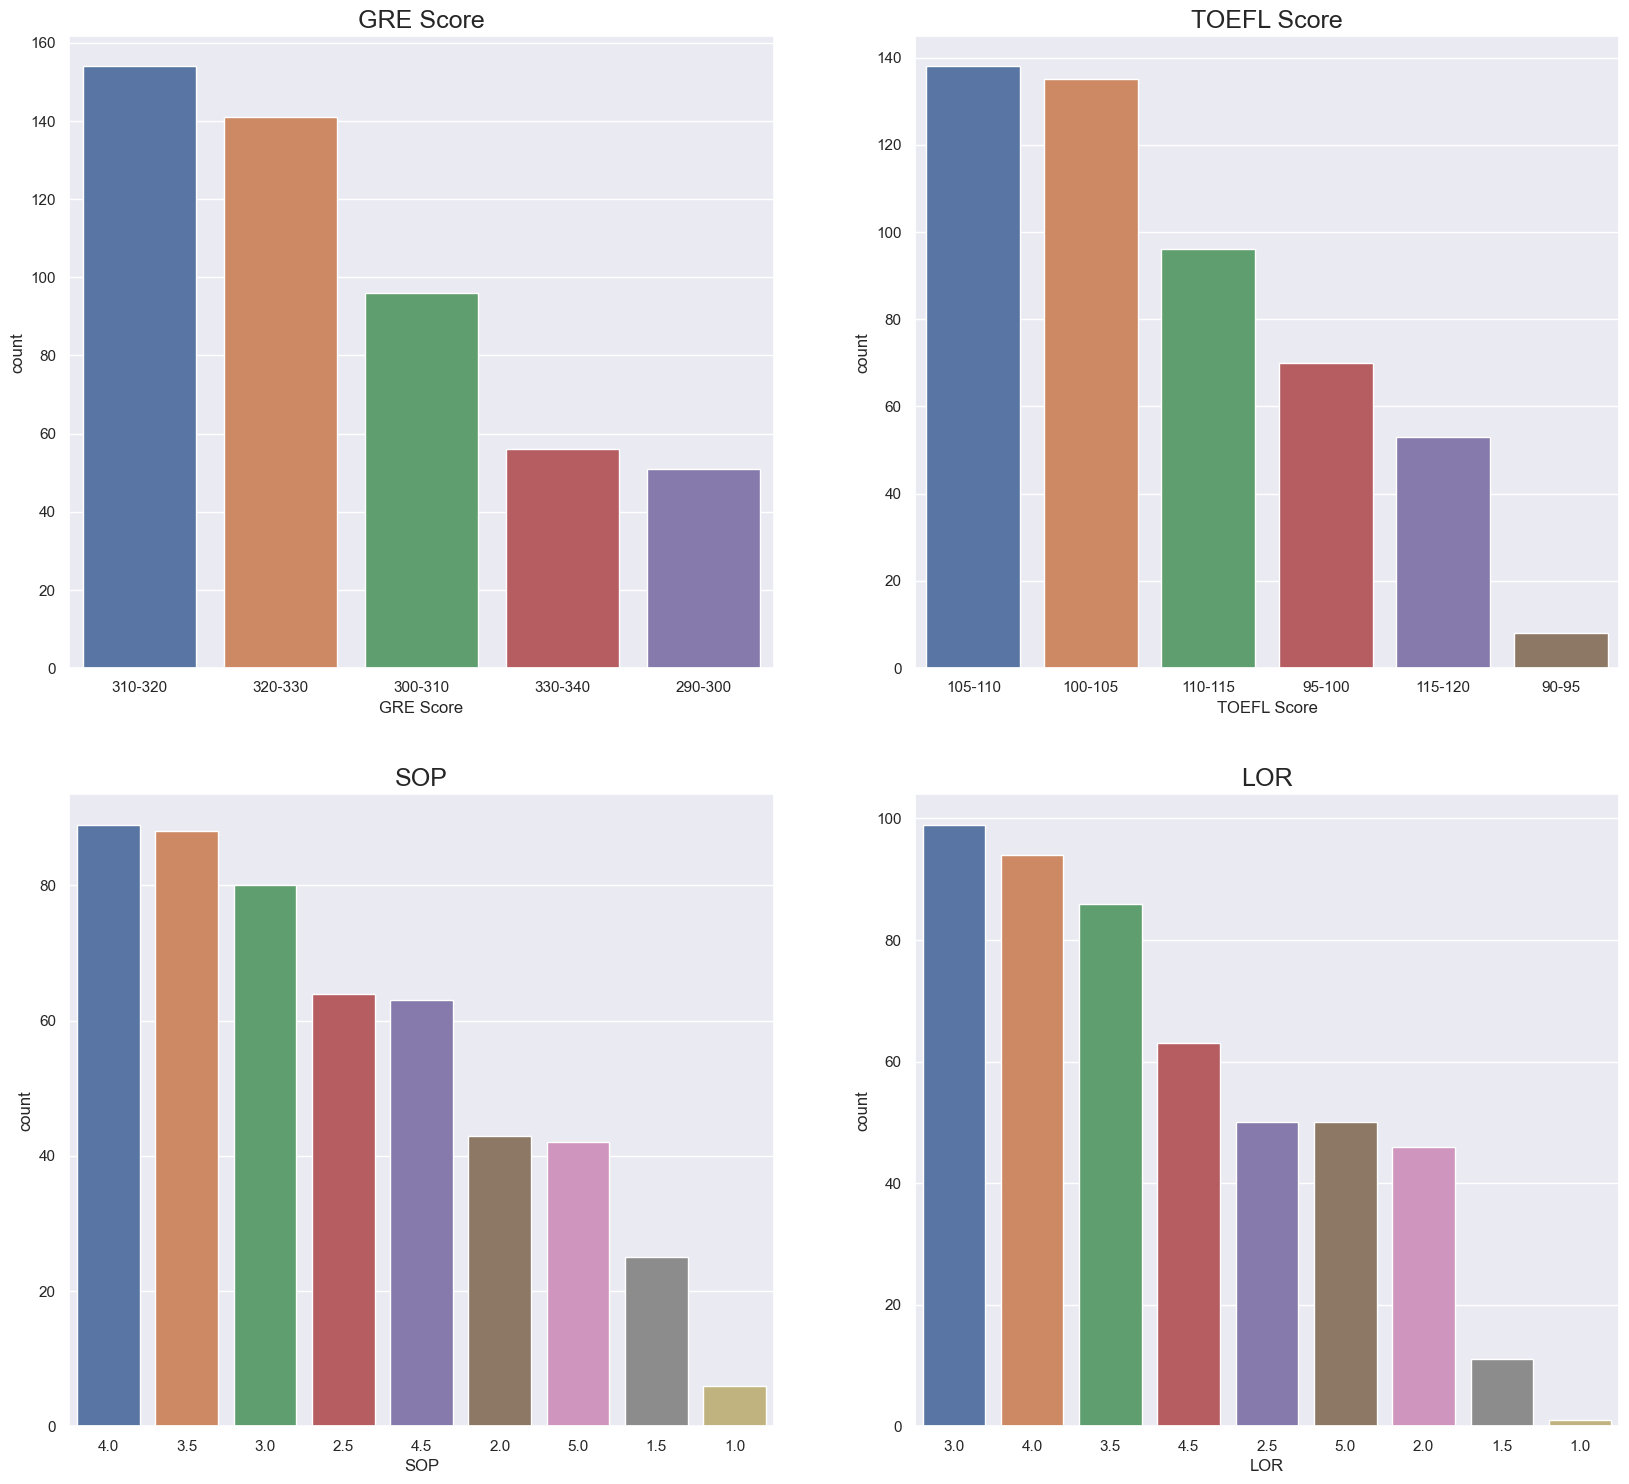

In [450]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
fig.subplots_adjust(top=1.5)
sns.set(font_scale=1.5)

sns.countplot(x = 'GRE Score', data = df1, order=df1['GRE Score'].value_counts(ascending=False).index,ax=axis[0,0])
sns.countplot(x = 'TOEFL Score', data = df1, order=df1['TOEFL Score'].value_counts(ascending=False).index,ax=axis[0,1])
sns.countplot(x = 'SOP', data = df, order=df['SOP'].value_counts(ascending=False).index,ax=axis[1,0])
sns.countplot(x = 'LOR', data = df, order=df['LOR'].value_counts(ascending=False).index,ax=axis[1,1])

axis[0,0].set_title("GRE Score",fontsize=18)
axis[0,1].set_title("TOEFL Score", fontsize=18)
axis[1,0].set_title("SOP", fontsize=18)
axis[1,1].set_title("LOR", fontsize=18)

plt.show()

<Axes: ylabel='Research'>

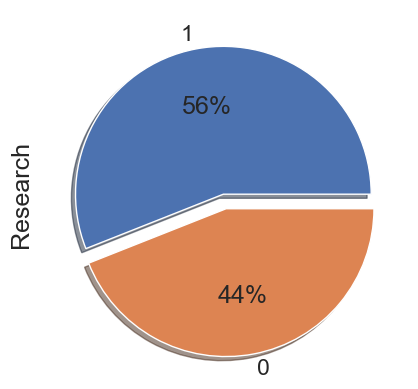

In [451]:
df['Research'].value_counts().plot(kind='pie',shadow=True,explode=(0,0.1),autopct='%.0f%%')

In [452]:
gre_rating = df.groupby('University Rating')['GRE Score'].mean()
gre_rating

University Rating
1    304.911765
2    309.134921
3    315.030864
4    323.304762
5    327.890411
Name: GRE Score, dtype: float64

In [453]:
toefl_rating = df.groupby('University Rating')['TOEFL Score'].mean()
toefl_rating

University Rating
1    100.205882
2    103.444444
3    106.314815
4    110.961905
5    113.438356
Name: TOEFL Score, dtype: float64

In [454]:
sop_rating = df.groupby('University Rating')['SOP'].mean()
sop_rating

University Rating
1    1.941176
2    2.682540
3    3.308642
4    4.000000
5    4.479452
Name: SOP, dtype: float64

In [455]:
lor_rating = df.groupby('University Rating')['LOR'].mean()
lor_rating

University Rating
1    2.426471
2    2.956349
3    3.401235
4    3.947619
5    4.404110
Name: LOR, dtype: float64

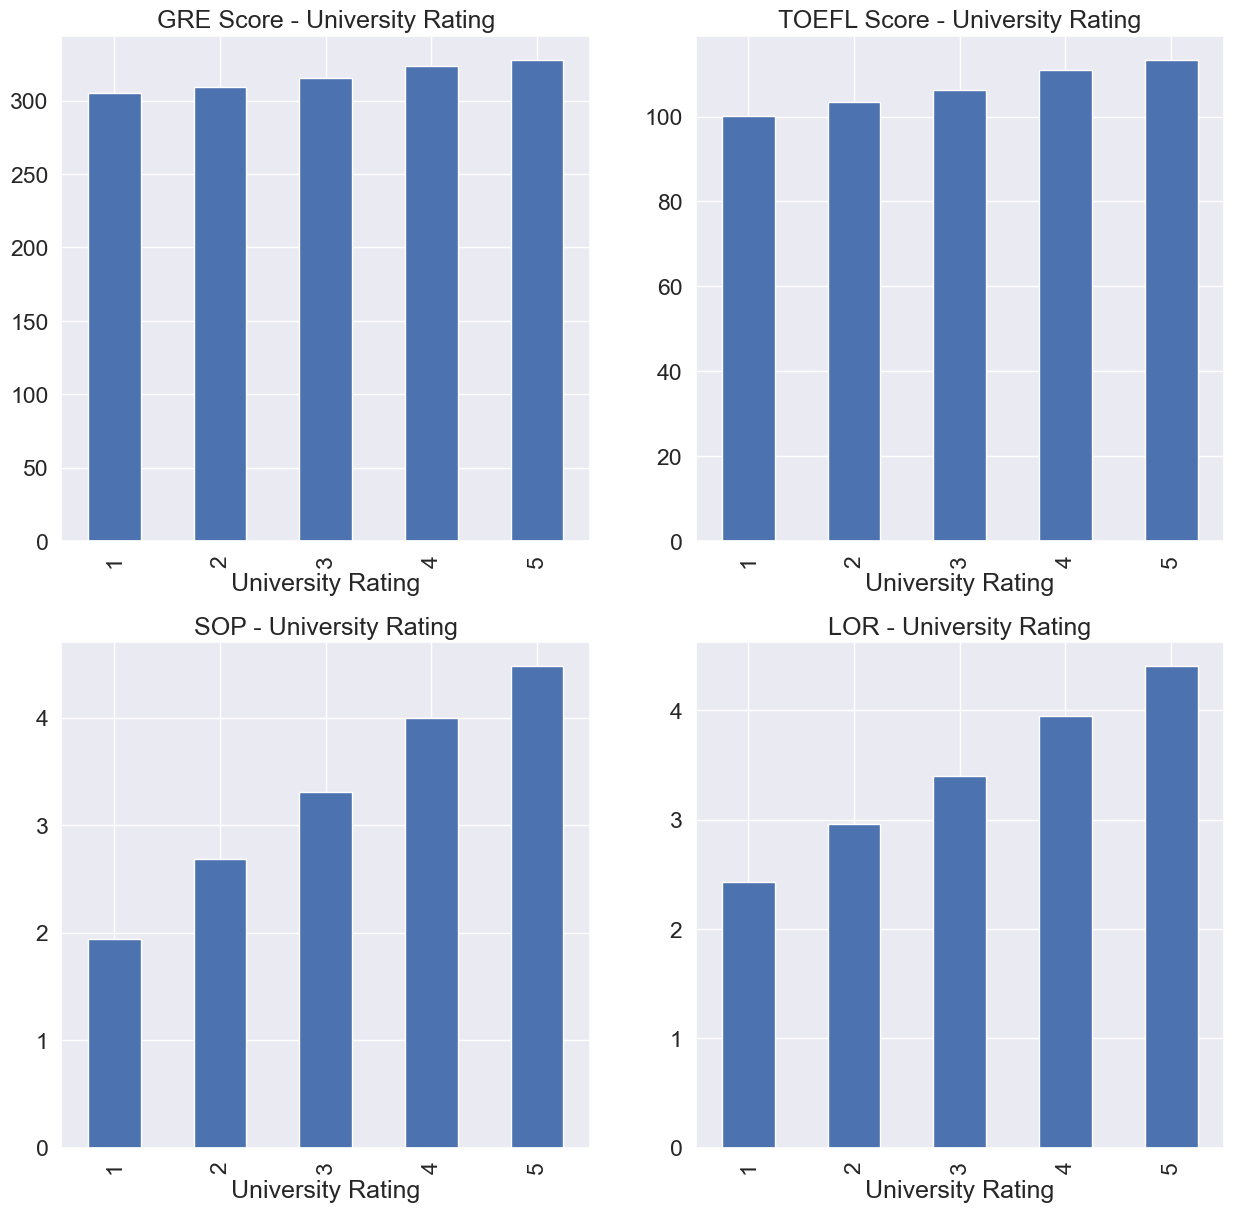

In [456]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
fig.subplots_adjust(top=1.5)
sns.set(font_scale=1.5)

gre_rating.plot(kind='bar',ax=axis[0,0])
toefl_rating.plot(kind='bar',ax=axis[0,1])
sop_rating.plot(kind='bar',ax=axis[1,0])
lor_rating.plot(kind='bar',ax=axis[1,1])

axis[0,0].set_title("GRE Score - University Rating",fontsize=18)
axis[0,1].set_title("TOEFL Score - University Rating", fontsize=18)
axis[1,0].set_title("SOP - University Rating", fontsize=18)
axis[1,1].set_title("LOR - University Rating", fontsize=18)

plt.show()

In [457]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

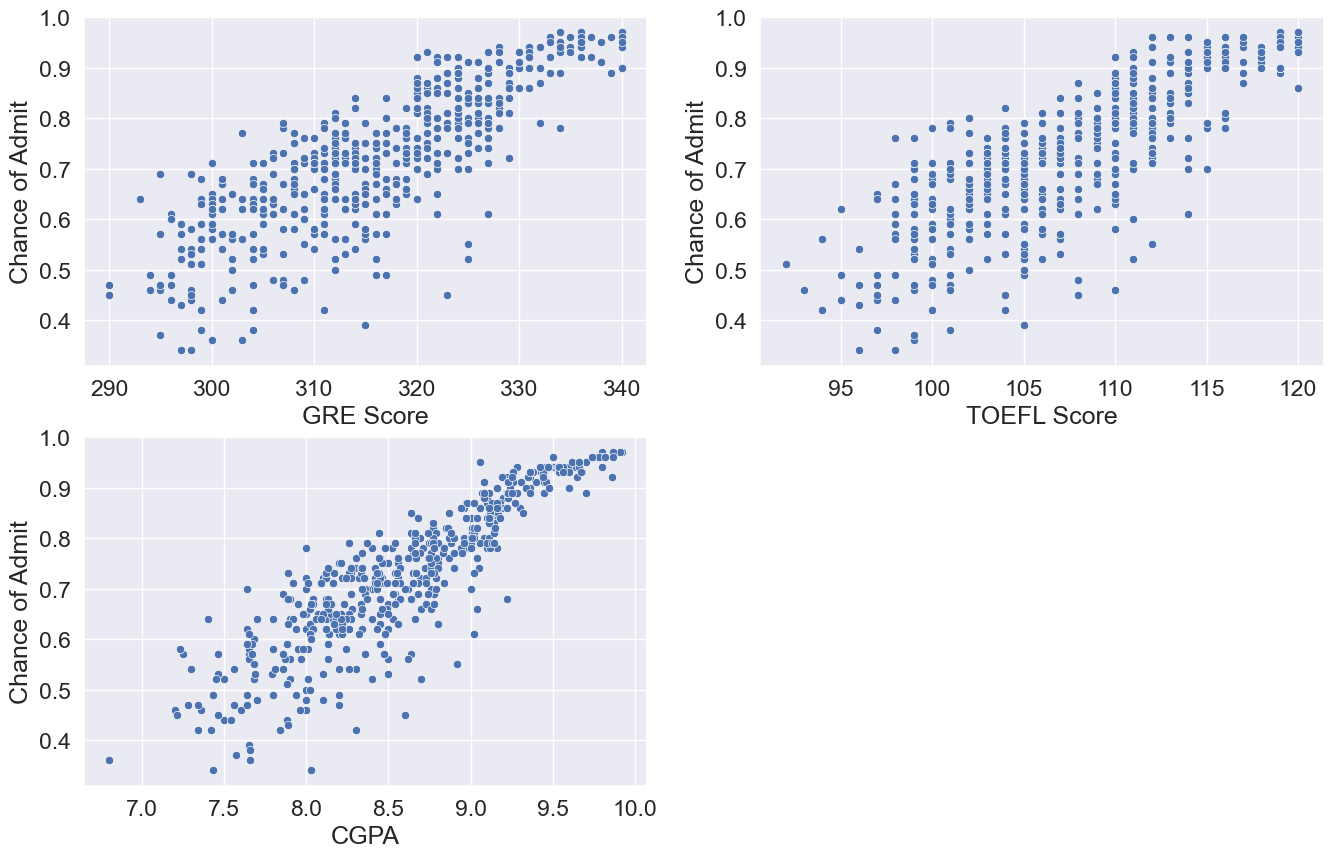

In [458]:
nrows, ncols = 2, 2
fig, axis = plt.subplots(nrows, ncols, figsize=(16,10))
index = 0
for row in range(nrows):
     for col in range(ncols):
            sns.scatterplot(x=numerical_columns[index], y=df['Chance of Admit'], data=df, ax=axis[row, col])

            axis[1,1].axis('off')
            index += 1            
fig.delaxes(axis[1][1])

Seems like there is a linear correlation between the continuous variables and the target variable.


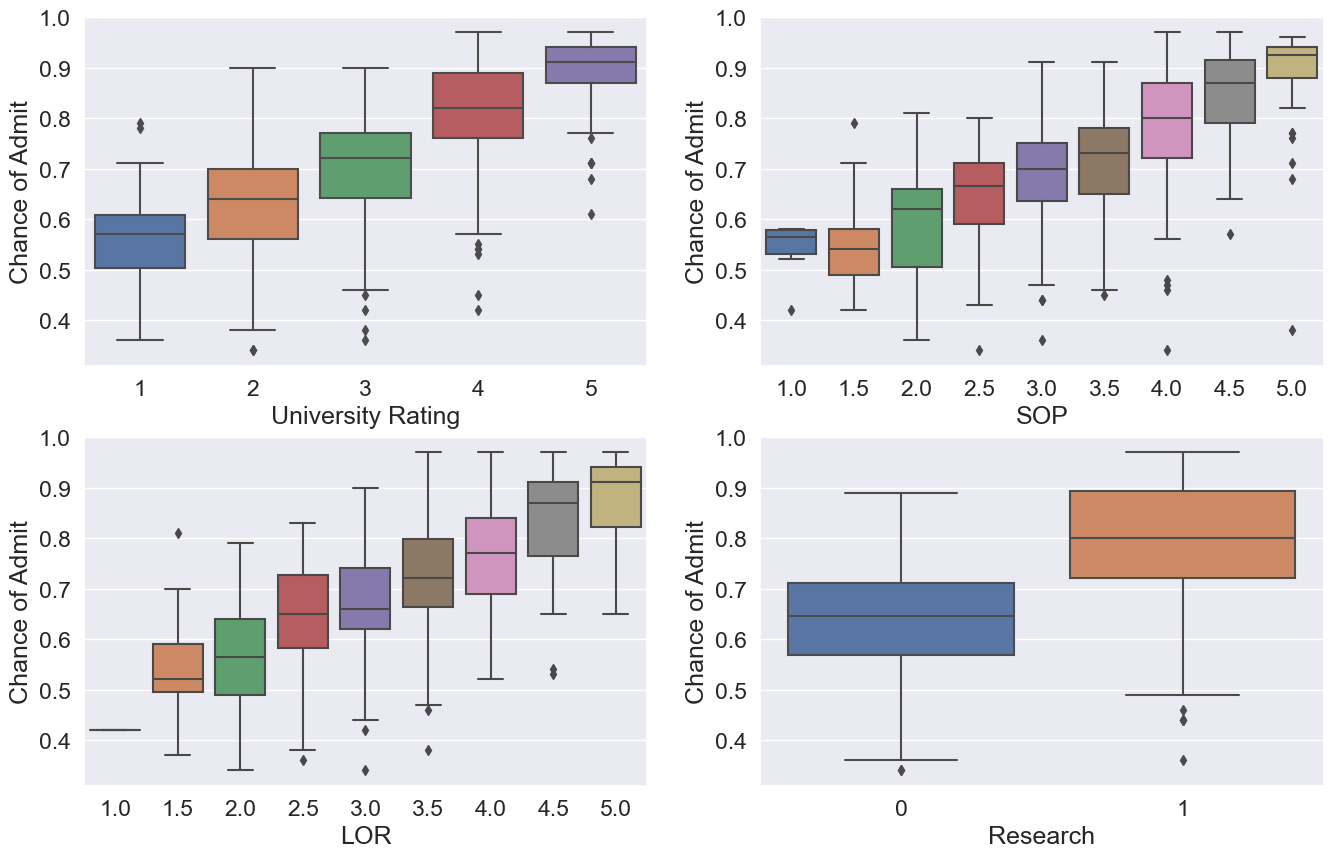

In [459]:
nrows, ncols = 2, 2
fig, axis = plt.subplots(nrows, ncols, figsize=(16,10))
index = 0
for row in range(nrows):
     for col in range(ncols):
            sns.boxplot(x=categorical_columns[index], y = df['Chance of Admit'], data=df, ax=axis[row,col])
            index += 1

- As you can see from the graphs, as tge rating increases the Chance of Admit also increases.
- Students who have the research experience have more chances of Admin as compared to other students who don't have the research experience.

In [460]:
numerical_columns = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']
categorical_columns = ['University Rating', 'SOP', 'LOR', 'Research']

In [461]:
df1=df.copy()

In [462]:
# Feature binning:
df1['GRE Score'] = pd.cut(df1['GRE Score'],bins=[290,300,310,320,330,340],labels=['290-300','300-310','310-320','320-330','330-340'])
df1['TOEFL Score'] = pd.cut(df1['TOEFL Score'],bins=[90,95,100,105,110,115,120],labels=['90-95','95-100','100-105','105-110','110-115','115-120'])
df1['CGPA'] = pd.cut(df1['CGPA'],bins=[6.2,7.2,8.2,9.2,10], labels=['Third Class','Second Class','First Class','Distinction'])
df1['Chance of Admit'] = pd.cut(df1['Chance of Admit'],bins=[0,0.3,0.5,0.7,0.9,1],labels=['Very Low','Low','Medium','High','Very High'])

In [361]:
df1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,330-340,115-120,4,4.5,4.5,Distinction,1,Very High
2,320-330,105-110,4,4.0,4.5,First Class,1,High
3,310-320,100-105,3,3.0,3.5,Second Class,1,High
4,320-330,105-110,3,3.5,2.5,First Class,1,High
5,310-320,100-105,2,2.0,3.0,First Class,0,Medium
...,...,...,...,...,...,...,...,...
496,330-340,105-110,5,4.5,4.0,First Class,1,High
497,330-340,115-120,5,5.0,5.0,Distinction,1,Very High
498,320-330,115-120,5,4.5,5.0,Distinction,1,Very High


<function matplotlib.pyplot.show(close=None, block=None)>

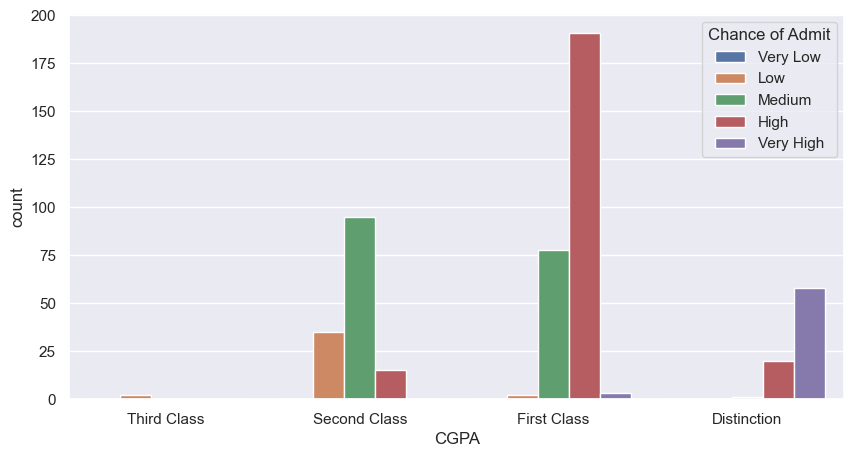

In [362]:
plt.figure(figsize=(10,5))
sns.countplot(x='CGPA', hue='Chance of Admit', data=df1)
sns.set(font_scale=1)
plt.show

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

<Figure size 500x500 with 0 Axes>

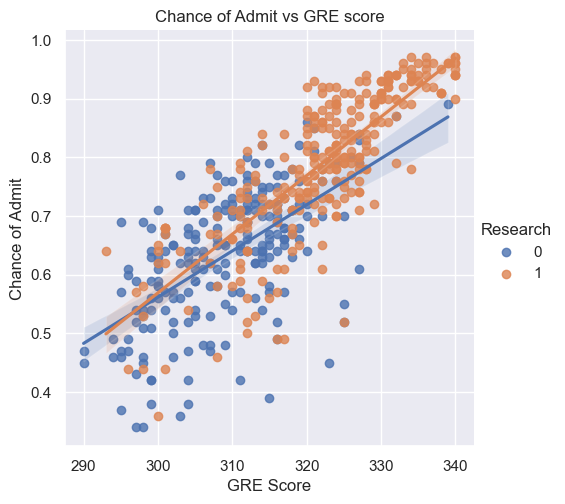

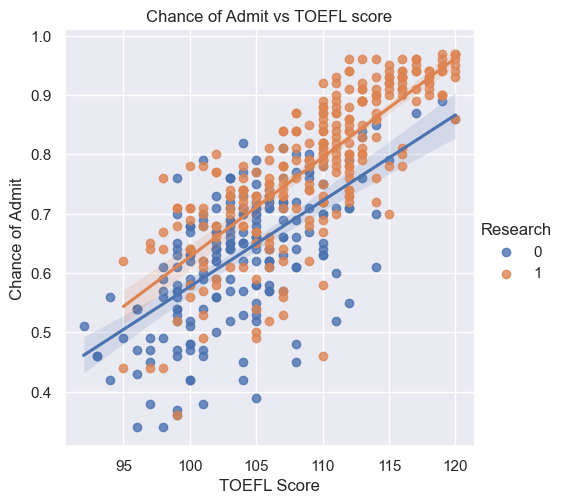

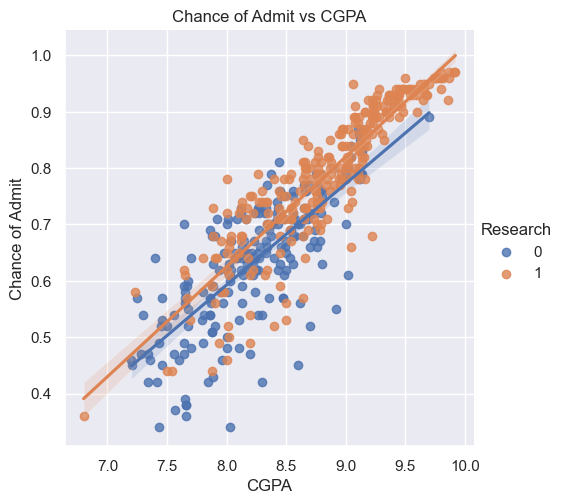

In [363]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1)

sns.lmplot(x='GRE Score', y='Chance of Admit', data=df, hue='Research')
plt.title('Chance of Admit vs GRE score')

sns.lmplot(x='TOEFL Score', y='Chance of Admit', data=df, hue='Research')
plt.title('Chance of Admit vs TOEFL score')

sns.lmplot(x='CGPA', y='Chance of Admit', data=df, hue='Research')
plt.title('Chance of Admit vs CGPA')

plt.plot

- The model linearly relate with the desire parameter 'Chance of Admit' with the other features like GRE, TOEFL score and CGPA.


### Predictive Analysis

In [364]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


In [365]:
y = df['Chance of Admit']
x = df.drop('Chance of Admit', axis = 1)

#### Standardization of data

In [366]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [367]:
#Splitting the Data for Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 1)

In [368]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train) 

LinearRegression()

In [369]:
X_train.shape

(350, 7)

In [370]:
y_train.shape

(350,)

In [371]:
y_pred = model.predict(X_test)
print("Predicted Y Values")
y_pred[:5]

Predicted Y Values


array([0.65280328, 0.70945113, 0.93670057, 0.73146137, 0.81803279])

In [372]:
print("Actual Y Values")
y_test[:5]

Actual Y Values


Serial No.
305    0.62
341    0.75
48     0.89
68     0.57
480    0.79
Name: Chance of Admit, dtype: float64

In [373]:
model.score(X_train,y_train) #train accuracy

0.8209843725364347

In [299]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
accuracy

0.8157672116057979

In [497]:
w=model.coef_
w0=model.intercept_
print('w:',w)
print('w0:',w0)

w: [ 0.01865693  0.02317626  0.01156475 -0.00099944  0.01249708  0.06467088
  0.01396816]
w0: 0.724978121476996


In [498]:
w.shape

(7,)

In [499]:
w=np.reshape(w,(1,len(w)))
w.shape

(1, 7)

#### Linear Model

In [503]:
y_hat=np.dot(w,np.transpose(X_train))+w0
y_hat.shape

(1, 350)

In [504]:
y_hat[:5]

array([[0.65856784, 0.62131878, 0.86816275, 0.59113857, 0.78272019,
        0.78077569, 0.79141389, 0.84529043, 0.90016097, 0.56019252,
        0.69922032, 0.7880024 , 0.48116909, 0.78718983, 0.71630535,
        0.64327779, 0.7538437 , 0.85397198, 0.66999483, 0.83742704,
        0.5338518 , 0.77117199, 0.52394237, 0.80077886, 0.85559701,
        0.88877595, 0.50188048, 0.86347254, 0.81220534, 0.54078399,
        0.65659462, 0.52280928, 0.51940611, 0.68532475, 0.6228216 ,
        0.57898646, 0.6284577 , 0.94862526, 0.85287032, 0.58551294,
        0.6138498 , 0.85540245, 0.81996496, 0.63018103, 0.62762816,
        0.7521395 , 0.74076098, 0.68847671, 0.71112426, 0.6190362 ,
        0.7405237 , 0.80761033, 0.61629807, 0.62368926, 0.65942628,
        0.61988103, 0.71764206, 0.67100793, 0.81680875, 0.74713778,
        0.84101221, 0.65450314, 0.90788772, 0.80964388, 0.65907802,
        0.82165319, 0.77813977, 0.62095973, 0.68467332, 0.71779364,
        0.65113466, 0.71425725, 0.71379862, 0.94

In [505]:
y_pred[:5]

array([0.65686834, 0.71211885, 0.93590086, 0.73148132, 0.82199339])

In [506]:
X_test.shape

(150, 7)

In [508]:
w

array([[ 0.01865693,  0.02317626,  0.01156475, -0.00099944,  0.01249708,
         0.06467088,  0.01396816]])

In [509]:
w[0][5]

0.06467087936859962

In [496]:
# display model coefficients with column names
w=model.coef_
columns=np.array(df1.columns)
for i in range(len(w)):
    print(columns[i],' :', w[i])

GRE Score  : 0.01865692878651312
TOEFL Score  : 0.023176256606409748
University Rating  : 0.011564750881893224
SOP  : -0.0009994406786924155
LOR  : 0.012497084970069261
CGPA  : 0.06467087936859962
Research  : 0.01396815726482556


### Distribution of predicted and actual

In [510]:
y_test

Serial No.
305    0.62
341    0.75
48     0.89
68     0.57
480    0.79
       ... 
332    0.73
198    0.73
96     0.42
123    0.57
24     0.95
Name: Chance of Admit, Length: 150, dtype: float64

In [511]:
y_test_pred=model.predict(X_test)
y_test_pred

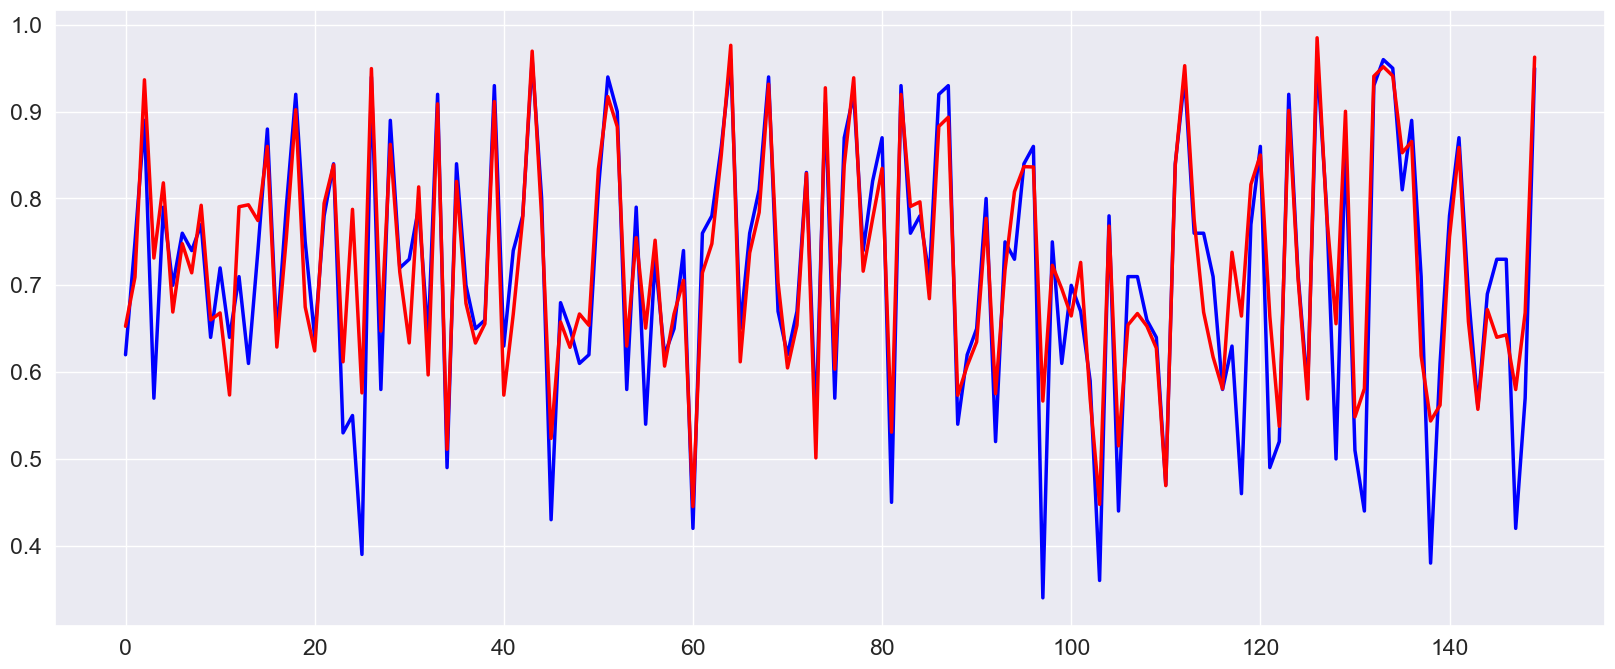

In [512]:
c = [i for i in range(0,150)]
plt.figure(figsize=(20,8))
plt.plot(c,y_test,color="blue", linewidth=2.5)
plt.plot(c,y_test_pred,color="red", linewidth=2.5)

We can see that actual and predicted values are almost same

#### Distribution of error

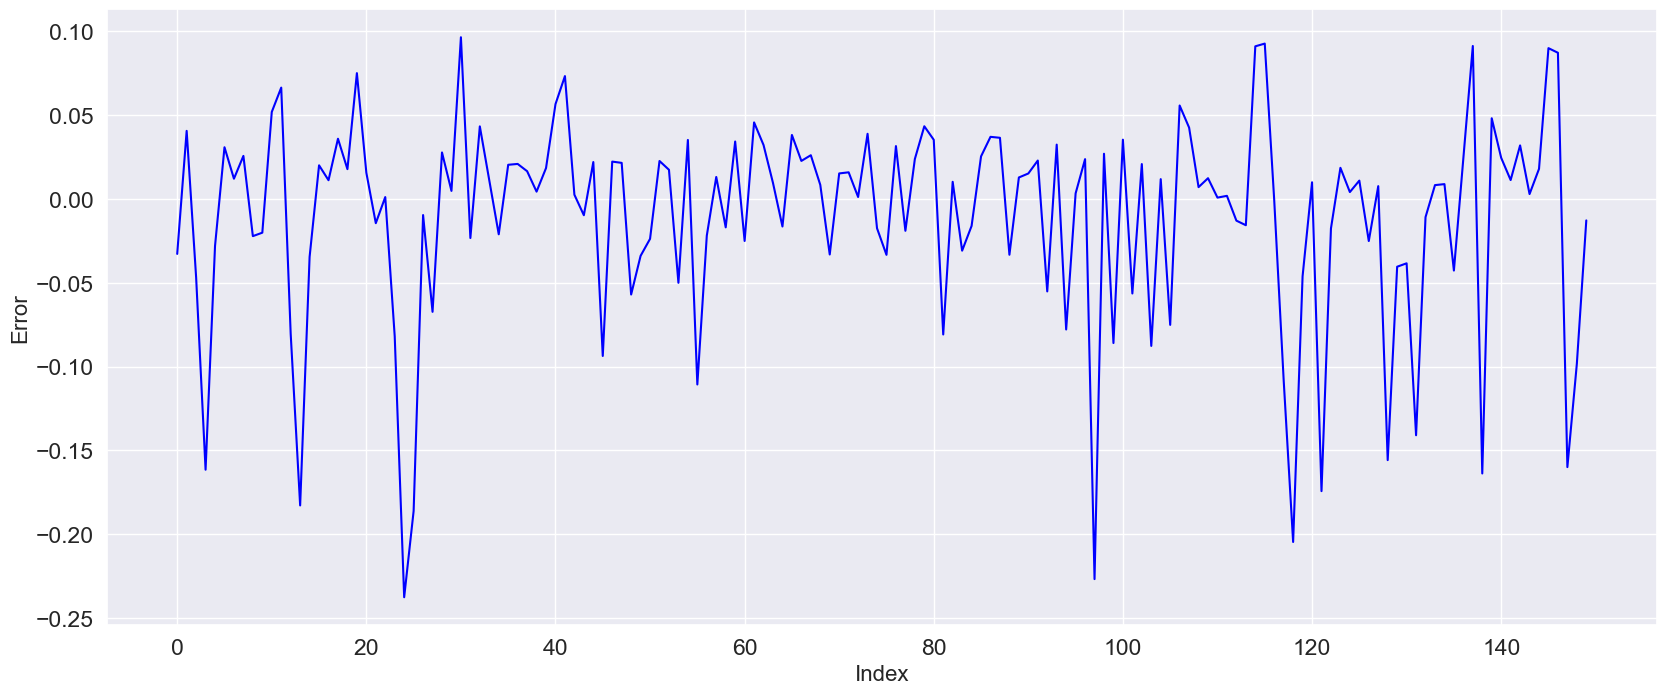

In [513]:
c = [i for i in range(0,150)]
plt.figure(figsize=(20,8))
plt.plot(c,y_test-y_test_pred,color="blue")
plt.xlabel('Index', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.show()

Residuals are in range of -0.15 to 0.1

## Testing the Assumptions

### 1. Multicollinearity

In [514]:
X_train1=pd.DataFrame(X_train, columns=['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA', 'Research'])
X_train1

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,-0.839430,0.297575,-0.099793,0.632315,-0.523513,-0.954043,0.886405
1,-0.839430,-1.019128,-0.099793,0.632315,-0.523513,-0.623031,-1.128152
2,1.198882,1.120514,-0.099793,1.137360,1.098944,1.098232,0.886405
3,-0.839430,0.132987,-0.975168,0.632315,0.017306,-1.450561,-1.128152
4,0.489904,0.462163,-0.099793,0.632315,1.639763,0.105196,0.886405
...,...,...,...,...,...,...,...
345,-0.839430,0.462163,0.775582,0.632315,1.098944,-0.341671,-1.128152
346,0.401282,0.626751,1.650957,1.642404,1.639763,1.445794,0.886405
347,0.755771,-0.031601,-0.099793,-0.377773,0.017306,0.883074,0.886405
348,0.844393,0.626751,1.650957,1.137360,0.558125,1.081681,0.886405


In [416]:
def multi_collinear():
    vif_1st=[]
    for i in X_train1.columns:
        X1=X_train1[i].values
        X2=X_train1.drop(i,axis=1)
        X2=X2.values
        model.fit(X2, X1)
        X1_hat=model.predict(X2)
        den=sum(((X1-X1.mean())**2))
        num=sum((X1-X1_hat)**2)
        score=1-(num/den)
        vif=1/(1-(score))
        vif_1st.append(vif)
    return vif_1st
multi_collinear()

[4.490800765368461,
 4.150299756033579,
 2.999307852461495,
 2.9629349710455912,
 2.0264924171286234,
 4.634872272296927,
 1.5281196653391538]

Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)
- VIF values of all columns are less than 5. So has less multicollinearity


### 2. The mean of residuals is nearly zero

In [515]:
y_test_pred

array([0.65280328, 0.70945113, 0.93670057, 0.73146137, 0.81803279,
       0.66920636, 0.74796312, 0.71437662, 0.79220523, 0.66014296,
       0.66818041, 0.57365165, 0.79048746, 0.79275362, 0.77460648,
       0.85998859, 0.62886953, 0.75414155, 0.90227196, 0.67503422,
       0.62439904, 0.79448136, 0.83891151, 0.61190399, 0.78749169,
       0.57607235, 0.94963666, 0.64733575, 0.8623322 , 0.71522672,
       0.63363523, 0.81333335, 0.59677901, 0.90897556, 0.51109914,
       0.81966876, 0.67915838, 0.63348767, 0.65567508, 0.91162667,
       0.57351247, 0.66678197, 0.77751227, 0.96973634, 0.77804167,
       0.52364615, 0.65776846, 0.62852765, 0.66699699, 0.65395225,
       0.83381271, 0.91740807, 0.8826517 , 0.63003308, 0.75486868,
       0.65064233, 0.75191415, 0.60692357, 0.66696528, 0.70579381,
       0.44508726, 0.71440199, 0.74788172, 0.85051786, 0.97645415,
       0.61189214, 0.73736489, 0.78395854, 0.93164097, 0.70314242,
       0.60482269, 0.65415503, 0.82887293, 0.50120221, 0.92751

In [517]:
y_test

Serial No.
305    0.62
341    0.75
48     0.89
68     0.57
480    0.79
       ... 
332    0.73
198    0.73
96     0.42
123    0.57
24     0.95
Name: Chance of Admit, Length: 150, dtype: float64

In [518]:
residual = np.array(y_test - y_test_pred)
residual

array([-0.03280328,  0.04054887, -0.04670057, -0.16146137, -0.02803279,
        0.03079364,  0.01203688,  0.02562338, -0.02220523, -0.02014296,
        0.05181959,  0.06634835, -0.08048746, -0.18275362, -0.03460648,
        0.02001141,  0.01113047,  0.03585845,  0.01772804,  0.07496578,
        0.01560096, -0.01448136,  0.00108849, -0.08190399, -0.23749169,
       -0.18607235, -0.00963666, -0.06733575,  0.0276678 ,  0.00477328,
        0.09636477, -0.02333335,  0.04322099,  0.01102444, -0.02109914,
        0.02033124,  0.02084162,  0.01651233,  0.00432492,  0.01837333,
        0.05648753,  0.07321803,  0.00248773, -0.00973634,  0.02195833,
       -0.09364615,  0.02223154,  0.02147235, -0.05699699, -0.03395225,
       -0.02381271,  0.02259193,  0.0173483 , -0.05003308,  0.03513132,
       -0.11064233, -0.02191415,  0.01307643, -0.01696528,  0.03420619,
       -0.02508726,  0.04559801,  0.03211828,  0.00948214, -0.01645415,
        0.03810786,  0.02263511,  0.02604146,  0.00835903, -0.03

In [519]:
np.mean(residual)

-0.010793738256654507

We can see that mean of residuals is approxmatly equals to zero
- If residuals is close to zero, it suggests that the model is not consistently overestimating or underestimating the outcome variable, indicating that the model has a good balance
between bias and variance.

### 3. Linearity of variables

C:\Users\salma\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


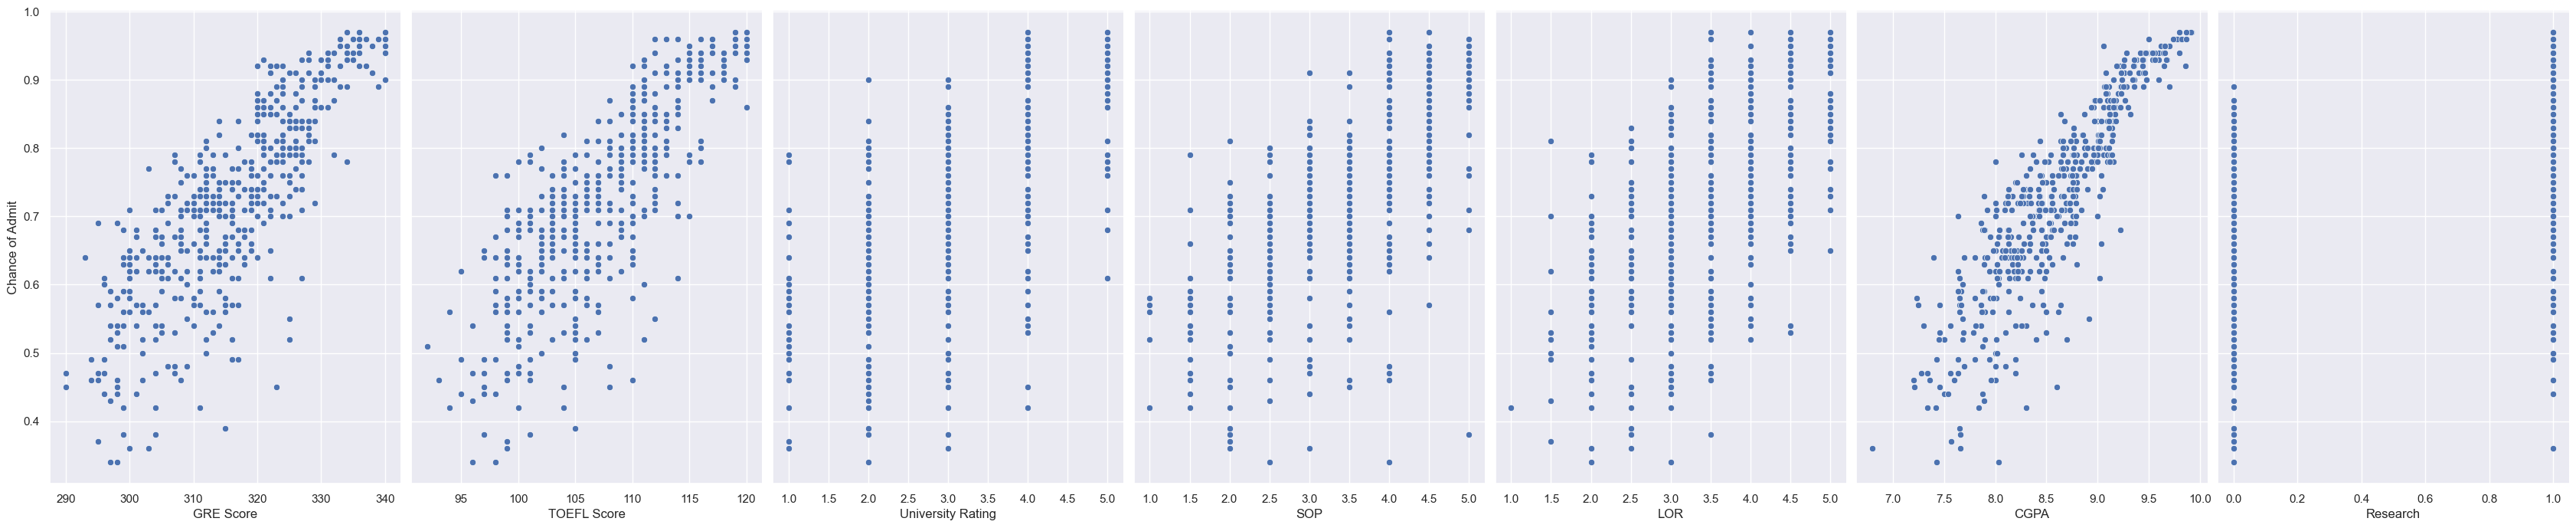

In [421]:
sns.pairplot(df, x_vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'], 
             y_vars='Chance of Admit',size=7, aspect=0.7, kind='scatter')

In [523]:
# for i in df.columns:
#     plt.figure(figsize=(8,8))
#     if i==df.columns[-1]:
#         break
#     else:
#         fig,ax=plt.subplots(nrows=1,ncols=1)
#         sns.scatterplot(x=df[i],y=df["Chance of Admit"])

- We can see that all features are are linear to dependent variable 'Chance of admit'

### 4. Test for Homoscedasticity

In [520]:
np.var(residual)

0.004009429451154633

- We can see the variance of residuals are very low . So it obey Homocedasticty

- How much the predicted values differ from the actual values (the bias or error), the difference between the predicted and
actual values as a scatter plot.

In [524]:
X_test1=pd.DataFrame(X_test, columns=['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA', 'Research'])
X_test1

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,-0.307696,-0.196189,-0.975168,-0.882817,-1.605151,-0.242367,-1.128152
1,-0.396319,-0.031601,-0.099793,-0.377773,-0.523513,-0.192715,0.886405
2,1.996482,1.943453,1.650957,1.137360,0.558125,1.859559,-1.128152
3,-0.041830,-0.031601,-0.975168,0.127271,0.017306,0.105196,0.886405
4,0.755771,0.462163,0.775582,1.137360,0.558125,0.634815,0.886405
...,...,...,...,...,...,...,...
145,-0.484941,-0.360777,-0.975168,-0.377773,-1.605151,-0.755436,0.886405
146,-0.573563,-0.196189,-0.975168,0.127271,-1.064332,-0.407873,-1.128152
147,-1.105297,-1.183716,0.775582,-1.892906,-1.064332,-1.218852,-1.128152
148,-0.573563,-0.196189,0.775582,-1.892906,-1.064332,-0.358221,-1.128152


In [525]:
test_h=X_test1.copy()
test_h['residual']=residual
test_h['predicted_y']=y_test_pred
test_h

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,residual,predicted_y
0,-0.307696,-0.196189,-0.975168,-0.882817,-1.605151,-0.242367,-1.128152,-0.032803,0.652803
1,-0.396319,-0.031601,-0.099793,-0.377773,-0.523513,-0.192715,0.886405,0.040549,0.709451
2,1.996482,1.943453,1.650957,1.137360,0.558125,1.859559,-1.128152,-0.046701,0.936701
3,-0.041830,-0.031601,-0.975168,0.127271,0.017306,0.105196,0.886405,-0.161461,0.731461
4,0.755771,0.462163,0.775582,1.137360,0.558125,0.634815,0.886405,-0.028033,0.818033
...,...,...,...,...,...,...,...,...,...
145,-0.484941,-0.360777,-0.975168,-0.377773,-1.605151,-0.755436,0.886405,0.089864,0.640136
146,-0.573563,-0.196189,-0.975168,0.127271,-1.064332,-0.407873,-1.128152,0.087111,0.642889
147,-1.105297,-1.183716,0.775582,-1.892906,-1.064332,-1.218852,-1.128152,-0.159900,0.579900
148,-0.573563,-0.196189,0.775582,-1.892906,-1.064332,-0.358221,-1.128152,-0.098366,0.668366


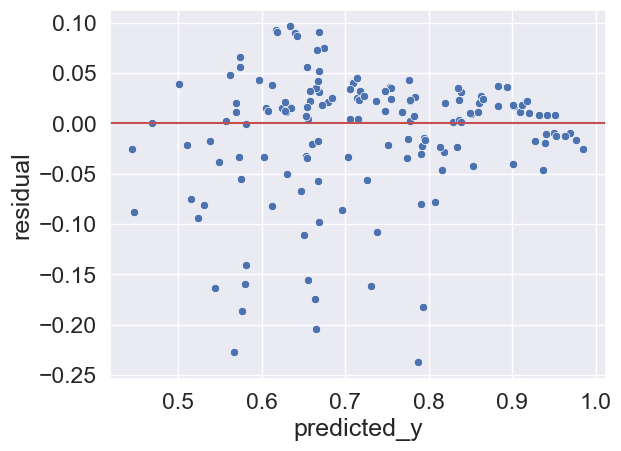

In [526]:
sns.scatterplot(x='predicted_y',y='residual',data=test_h)
plt.axhline(y=0, color='r', linestyle='-')

- From plot we can visualize the amount of bias is too low. it ranges from -0.15 to 0.1

### 5. Normality of residuals 

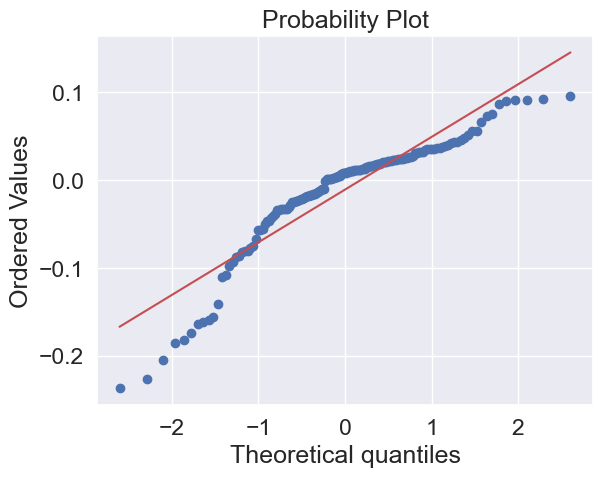

In [527]:
from scipy import stats
from scipy.stats import norm
stats.probplot(residual,dist='norm',plot=plt)
plt.show()

<Axes: ylabel='Density'>

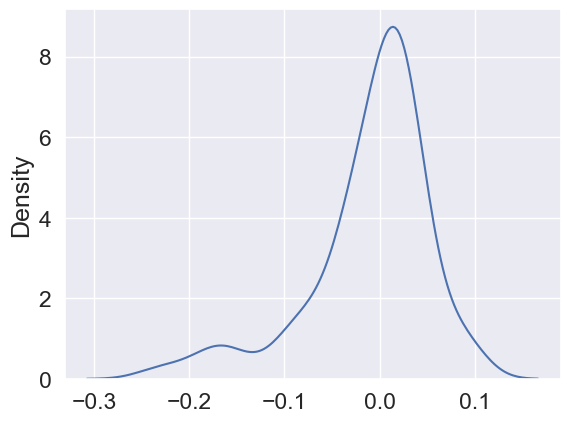

In [528]:
sns.kdeplot(residual)

We can see that almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line


#### Conclusion
<p>Based on the given assumptions, we can conclude that our linear regression model meets the basic assumptions of linear regression. However, it is possible that the model may still
have high variance or overfitting, which can be addressed through regularization techniques like Lasso and Ridge regression.</p>
<p>To determine whether we need to use regularization techniques like Lasso and Ridge in cross-validation, we need to consider the bias-variance tradeoff. If the model has high
variance, we need to use regularization techniques to reduce the variance and improve the model's ability to generalize to new data. If the model has high bias, we need to increase
the complexity of the model or collect more data to improve the model's ability to capture the underlying relationships in the data.</p>
<p>Therefore, to determine whether we need to use Lasso and Ridge in cross-validation, we need to evaluate the model's performance on a validation set or through cross-validation
and analyze the bias-variance tradeoff. If the model has high variance, we should consider using regularization techniques like Lasso and Ridge to improve the model's
generalization ability. If the model has high bias, we need to explore other options such as increasing the complexity of the model or collecting more data.</p>

### Model performance evaluation

Mean absolute error & Root mean square error

In [529]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
print('Mean_Squared_Error :',mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0041259342367078004
r_square_value : 0.8157672116057979


In [425]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [426]:
print('Train data accuracy =', model.score(X_train,y_train))

Train data accuracy = 0.8209843725364347


In [427]:
print('Test data accuracy =',model.score(X_test,y_test))

Test data accuracy = 0.8157672116057979


In [428]:
X=X_train1.copy()
X

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,-0.839430,0.297575,-0.099793,0.632315,-0.523513,-0.954043,0.886405
1,-0.839430,-1.019128,-0.099793,0.632315,-0.523513,-0.623031,-1.128152
2,1.198882,1.120514,-0.099793,1.137360,1.098944,1.098232,0.886405
3,-0.839430,0.132987,-0.975168,0.632315,0.017306,-1.450561,-1.128152
4,0.489904,0.462163,-0.099793,0.632315,1.639763,0.105196,0.886405
...,...,...,...,...,...,...,...
345,-0.839430,0.462163,0.775582,0.632315,1.098944,-0.341671,-1.128152
346,0.401282,0.626751,1.650957,1.642404,1.639763,1.445794,0.886405
347,0.755771,-0.031601,-0.099793,-0.377773,0.017306,0.883074,0.886405
348,0.844393,0.626751,1.650957,1.137360,0.558125,1.081681,0.886405


Test data have more accuracy than train data
From this we can conclude that test data have more accuracy than train data. So data is not overfit. It is balanced fit

### Checking Unwanted Features in data by VIF and OLS method (feature hypothesis) and check Accuracy

#### Checking for P-value Using STATSMODELS

In [531]:
import statsmodels.api as sm
X_sm = x
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_sm = sm.add_constant(X_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y,X_sm).fit()
# print the coefficients
lm_1.params

const               -1.275725
GRE Score            0.001859
TOEFL Score          0.002778
University Rating    0.005941
SOP                  0.001586
LOR                  0.016859
CGPA                 0.118385
Research             0.024307
dtype: float64

In [532]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          8.21e-180
Time:                        21:56:41   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.10

#### Check VIF including constant feature

In [431]:
X_c=pd.DataFrame(data=X_sm)
X_c['const'].value_counts()

1.0    350
Name: const, dtype: int64

In [533]:
X=x.copy()
X['constant']=1
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,constant
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,1
2,324,107,4,4.0,4.5,8.87,1,1
3,316,104,3,3.0,3.5,8.00,1,1
4,322,110,3,3.5,2.5,8.67,1,1
5,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,1
497,337,117,5,5.0,5.0,9.87,1,1
498,330,120,5,4.5,5.0,9.56,1,1


In [325]:
p=list(df['Chance of Admit'].values)

In [326]:
X['Chance of Admit']=p
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,constant,Chance of Admit
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,1,0.92
2,324,107,4,4.0,4.5,8.87,1,1,0.76
3,316,104,3,3.0,3.5,8.00,1,1,0.72
4,322,110,3,3.5,2.5,8.67,1,1,0.80
5,314,103,2,2.0,3.0,8.21,0,1,0.65
...,...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,1,0.87
497,337,117,5,5.0,5.0,9.87,1,1,0.96
498,330,120,5,4.5,5.0,9.56,1,1,0.93


In [327]:
import statsmodels.api as sm
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x.astype(float)).fit().rsquared 
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [328]:
vif_cal(X,'Chance of Admit')

,Var,Vif
7,constant,1511.50
5,CGPA,4.78
0,GRE Score,4.46
1,TOEFL Score,3.90
3,SOP,2.84
2,University Rating,2.62
4,LOR,2.03
6,Research,1.49


By VIF method we can see that 'constant' feature are significant
So, by checking both ols and vif we can see that all features are significant

#### Checking correlation among data

<Axes: >

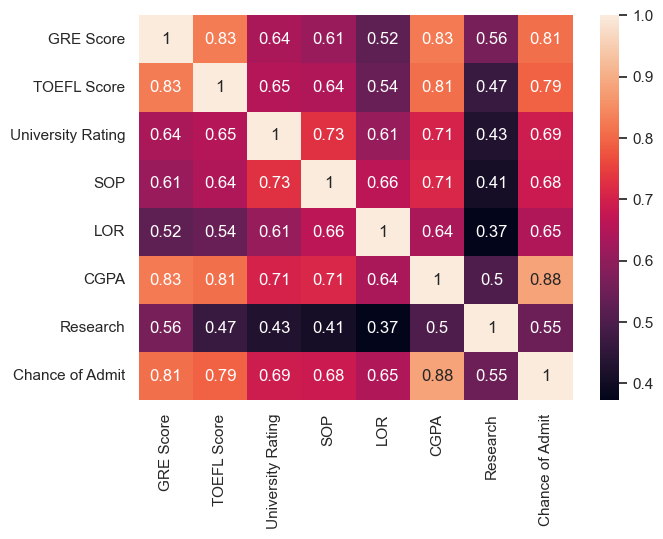

In [329]:
plt.figure(figsize = (7,5))
sns.heatmap(df.corr(),annot = True)      

By correlation CGPA, GRE score, TOFEL score are highly correlated
So we take any of these feature
Remove GRE score, TOFEL score

#### Implementing the results and running the model again


In [330]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'constant', 'Chance of Admit'],
      dtype='object')

In [376]:
X_train1=pd.DataFrame(X_train, columns=[
'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
 'LOR', 'CGPA', 'Research'])
X_test1=pd.DataFrame(X_test, columns=[
'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
 'LOR', 'CGPA', 'Research'])

In [377]:
# Removing University Rating,GRE Score,SOP from our dataset
X_train_new = X_train1[['University Rating', 'LOR', 'CGPA','Research']]
X_test_new = X_test1[['University Rating', 'LOR','CGPA','Research']]

In [381]:
model.fit(X_train_new,y_train)


LinearRegression()

In [383]:
y_pred_new = model.predict(X_test_new) # Making predictions

Text(0, 0.5, 'Sales')

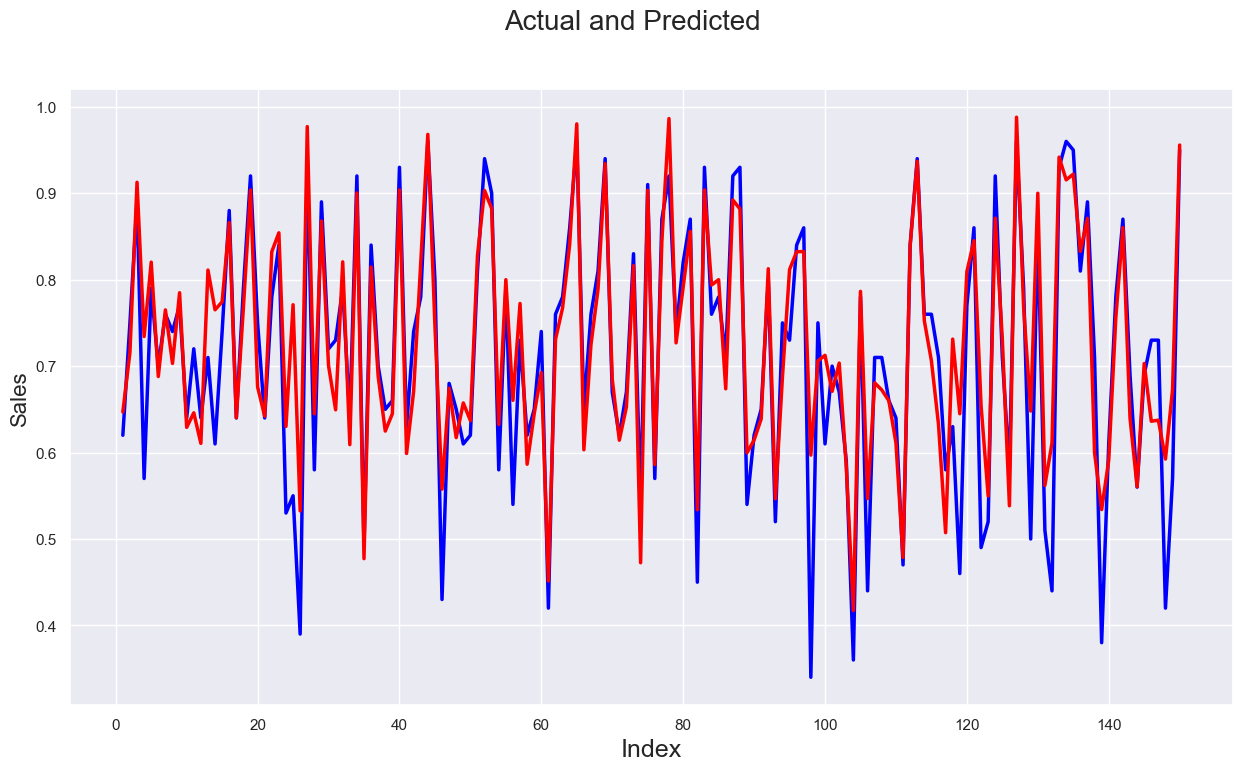

In [384]:
c = [i for i in range(1,151,1)]
fig = plt.figure(figsize=(15,8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_new, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) 
plt.xlabel('Index', fontsize=18) 
plt.ylabel('Sales', fontsize=16) 


In [385]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)

In [386]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


Mean_Squared_Error : 0.0042146504221178445
r_square_value : 0.8118058226751708


<p>Accuracy decrese by small amount when removing features GRE Score,TOFEL score
We only need to remove features when both ols method and vif score of features are wrong</p>
<p>We can see that Train data and test data gives higher accuracy. Here we can't conclude that For unseen data we get higher accuracy. So we need to check cross validation techniques to say accuratly minimum how much accuracy can give for unseen data</p>

### Generalisation
#### Ridge and Lasso Regression
Let's now try predicting Chance of admit, a dataset used in simple linear regression, to perform ridge and lasso regression.
Ridge Regressio

In [388]:
from sklearn.linear_model import Ridge

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.005, 0.007, 0.001, 0.01, 0.05, 0.1,
0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
4.0, 5.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

In [389]:
from sklearn.model_selection import GridSearchCV
#cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
 param_grid = params,
 scoring= 'r2',
 cv = folds,
 return_train_score=True,
verbose = 1) 
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.007, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [390]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013022,0.024827,0.001202,0.002405,0.0001,{'alpha': 0.0001},0.737649,0.904582,0.837959,0.774935,...,0.805123,0.059386,25,0.839188,0.800572,0.814812,0.828813,0.827926,0.822262,0.013322
1,0.002001,0.003104,0.000000,0.000000,0.001,{'alpha': 0.001},0.737649,0.904582,0.837960,0.774935,...,0.805123,0.059387,23,0.839188,0.800572,0.814812,0.828813,0.827926,0.822262,0.013322
2,0.001933,0.003866,0.000000,0.000000,0.005,{'alpha': 0.005},0.737646,0.904584,0.837962,0.774937,...,0.805124,0.059388,22,0.839188,0.800572,0.814812,0.828813,0.827926,0.822262,0.013322
3,0.002803,0.005607,0.000000,0.000000,0.007,{'alpha': 0.007},0.737645,0.904585,0.837963,0.774938,...,0.805124,0.059389,21,0.839188,0.800572,0.814812,0.828813,0.827926,0.822262,0.013322
4,0.001003,0.002006,0.000000,0.000000,0.001,{'alpha': 0.001},0.737649,0.904582,0.837960,0.774935,...,0.805123,0.059387,23,0.839188,0.800572,0.814812,0.828813,0.827926,0.822262,0.013322


In [391]:
 cv_results.loc[cv_results.mean_test_score==cv_results.mean_test_score.max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
23,0.0,0.0,0.003133,0.006266,10.0,{'alpha': 10.0},0.73162,0.90826,0.841213,0.77788,...,0.805904,0.062092,1,0.838723,0.799823,0.814037,0.828194,0.827367,0.821629,0.013427


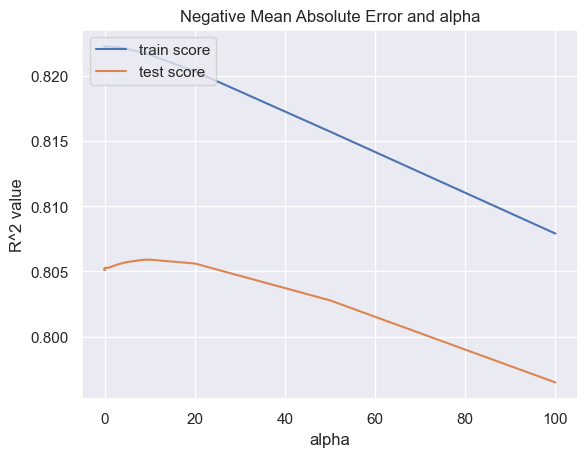

In [392]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R^2 value')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [393]:
alpha = 3
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.01935669,  0.02339431,  0.01165402, -0.00041155,  0.01261636,
        0.06273356,  0.01403346])

In [394]:
y_pred_ridge=ridge.predict(X_test)

In [395]:
mse = mean_squared_error(y_test, y_pred_ridge)
r_squared = r2_score(y_test, y_pred_ridge)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.004145153959427283
r_square_value : 0.8149090052201335


In [396]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [398]:
# cross validation
model_cv = GridSearchCV(estimator = lasso,
 param_grid = params,
 scoring= 'r2',
 cv = folds,
 return_train_score=True,
verbose = 1) 
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.007, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [399]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004843,0.009687,0.002466,0.003178,0.0001,{'alpha': 0.0001},0.737413,0.904554,0.838049,0.775731,...,0.805281,0.059341,3,0.839187,0.800566,0.814811,0.828806,0.827920,0.822258,0.013323
1,0.003329,0.003481,0.001203,0.001552,0.001,{'alpha': 0.001},0.735209,0.904206,0.838809,0.781557,...,0.806267,0.059187,1,0.839098,0.800464,0.814720,0.828228,0.827788,0.822059,0.013277
2,0.004565,0.003735,0.000000,0.000000,0.005,{'alpha': 0.005},0.724125,0.900411,0.840349,0.786464,...,0.804880,0.060428,4,0.836933,0.798336,0.812513,0.826259,0.825848,0.819978,0.013308
3,0.001613,0.003225,0.000207,0.000415,0.007,{'alpha': 0.007},0.717730,0.897089,0.839925,0.787786,...,0.803035,0.061057,5,0.834783,0.796208,0.810314,0.824292,0.823909,0.817901,0.013342
4,0.003130,0.006261,0.000000,0.000000,0.001,{'alpha': 0.001},0.735209,0.904206,0.838809,0.781557,...,0.806267,0.059187,1,0.839098,0.800464,0.814720,0.828228,0.827788,0.822059,0.013277


In [400]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

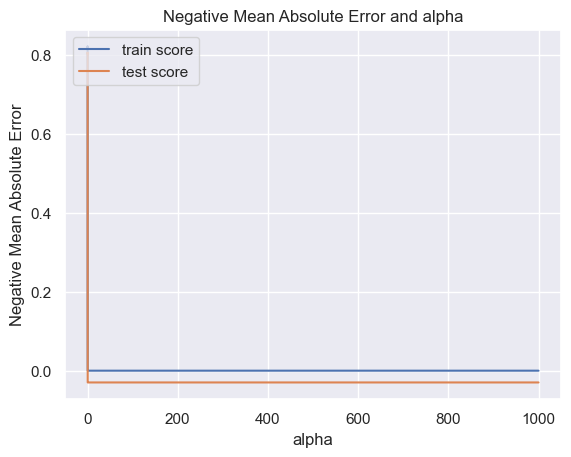

In [401]:
 # plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [402]:
 cv_results.loc[cv_results.mean_test_score==cv_results.mean_test_score.max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.003329,0.003481,0.001203,0.001552,0.001,{'alpha': 0.001},0.735209,0.904206,0.838809,0.781557,...,0.806267,0.059187,1,0.839098,0.800464,0.81472,0.828228,0.827788,0.822059,0.013277
4,0.003130,0.006261,0.000000,0.000000,0.001,{'alpha': 0.001},0.735209,0.904206,0.838809,0.781557,...,0.806267,0.059187,1,0.839098,0.800464,0.81472,0.828228,0.827788,0.822059,0.013277


In [403]:
#by hyperparameter tuning best alpha =0.01
alpha =0.01
lasso = Lasso(alpha=alpha)
 
lasso.fit(X_train, y_train)
lasso.coef_

array([0.01775501, 0.02058363, 0.00895251, 0.        , 0.0073064 ,
       0.06473126, 0.00817853])

In [404]:
 y_pred_lasso=lasso.predict(X_test)

In [405]:
mse = mean_squared_error(y_test, y_pred_lasso)
r_squared = r2_score(y_test, y_pred_lasso)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.004413654529943183
r_square_value : 0.8029198153897475


- In lasso regression By 5 fold cross validation method we can see that our model can accuratly predict at confidently above 80.29%
- From lasso and ridge Regression we can see that accuracy obtained is almost same. ridge Regression accuracy is highest

### Polynomial regression

In [406]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train2, y_train)
y_pred = poly_clf.predict(X_test2)
#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.8303290517984687


In [410]:
X_train1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.839430,0.297575,-0.099793,0.632315,-0.523513,-0.954043,0.886405
1,-0.839430,-1.019128,-0.099793,0.632315,-0.523513,-0.623031,-1.128152
2,1.198882,1.120514,-0.099793,1.137360,1.098944,1.098232,0.886405
3,-0.839430,0.132987,-0.975168,0.632315,0.017306,-1.450561,-1.128152
4,0.489904,0.462163,-0.099793,0.632315,1.639763,0.105196,0.886405
...,...,...,...,...,...,...,...
345,-0.839430,0.462163,0.775582,0.632315,1.098944,-0.341671,-1.128152
346,0.401282,0.626751,1.650957,1.642404,1.639763,1.445794,0.886405
347,0.755771,-0.031601,-0.099793,-0.377773,0.017306,0.883074,0.886405
348,0.844393,0.626751,1.650957,1.137360,0.558125,1.081681,0.886405


In [408]:
X_train2.shape

(350, 29)

In [409]:
print(poly_clf.score(X_test2, y_test))

0.8244870811279172


### Insights & Recommendations
#### Insights from Visualizations
- Chance of admit increses with increse in values of independent variables . most correlated freature is CGPA
- From the heatmap itself we see the correlation between all the parameters and in case of 'Chance of Admit' it is highest with 'CGPA' parameter.
- From Pairplot we came to know that 'University Rating', 'SOP', 'LOR ' & 'Research' are all categorical features and hence later on we have plotted count plots for them.
- Various plots (countplot, histplot etc.) showcased the distribution of the respective parameter values in the data
- At last regression plot showed the linear model that directly relate the desire parameter (Chance of Admit) with other parameters
- Among students who have done research vs those who did not, 56 % said Yes and 44 % said No
- More than 50% of the data has a university rating of 3 or 2
- A strong positive relationship exists between Chance of admit and numerical variables (GRE & TOEFL score and CGPA).
#### Predictive Analysis Insights
- Test data (83.5%) has more accuracy than Train data (81.3%). So it is balanced fit.
- We can see that actual and predicted values of train data are almost same.
- From model weights CGPA has the most feature importance, TOFEL score is second most.
- By checking OLS and VIF Score there is no common unwanted feature to remove.
- After removing of higher correlated features there is no improvement in accuracy. So all features are importent
- We can conclude that our linear regression model meets the basic assumptions of linear regression.
- However, it is possible that the model may still have high variance or overfitting, which can be addressed through regularization techniques like Lasso and Ridge regression.
- From lasso and ridge Regression we can see that accuracy obtained is almost same. ridge Regression accuracy is highest (83.68%)
- There no improvement in accuracy by checking Other models such as Polynomial Regression
#### Recommendations
- CGPA and Research are most two variables which are important in making the prediction for Chance of Admit. 
- Improving these marks will get into preffered university for applicants
- CGPA is the most important varibale in making the prediction for the Chance of Admit.
- All features are influencing the chance of Admit
- For higher University rating students need higher marks to increse chance of admission
- A higher value of LOR and SPO will also increases the chance of admission for the student